In [6]:
import pandas as pd
import numpy as np 
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import yfinance as yf
import datetime 
datetime.datetime.now(),datetime.datetime.now() - datetime.timedelta(5)

(datetime.datetime(2024, 3, 4, 19, 14, 0, 433828),
 datetime.datetime(2024, 2, 28, 19, 14, 0, 433828))

In [110]:
#data
prices = yf.download('BTC-USD',interval = '1D',start=datetime.datetime.now() - datetime.timedelta(5000),end = datetime.datetime.now())



prices = prices['Close']
ret = prices#.pct_change().dropna()

[*********************100%%**********************]  1 of 1 completed


In [111]:
lag = 5
future_ret = ret.shift(-lag)
ret,future_ret

(Date
 2014-09-17      457.334015
 2014-09-18      424.440002
 2014-09-19      394.795990
 2014-09-20      408.903992
 2014-09-21      398.821014
                   ...     
 2024-02-29    61198.382812
 2024-03-01    62440.632812
 2024-03-02    62029.847656
 2024-03-03    63167.371094
 2024-03-04    66694.984375
 Name: Close, Length: 3457, dtype: float64,
 Date
 2014-09-17    402.152008
 2014-09-18    435.790985
 2014-09-19    423.204987
 2014-09-20    411.574005
 2014-09-21    404.424988
                  ...    
 2024-02-29           NaN
 2024-03-01           NaN
 2024-03-02           NaN
 2024-03-03           NaN
 2024-03-04           NaN
 Name: Close, Length: 3457, dtype: float64)

In [147]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = np.array(ret)#.reshape(len(ret),1)
X = scaler.fit_transform(X)
X = X[:ret.shape[0] - lag]
y = np.array(future_ret)
y = y[:-lag]
y = scaler.fit_transform(X).flatten()
X,y

(array([[  457.33401489],
        [  424.44000244],
        [  394.79598999],
        ...,
        [54522.40234375],
        [57085.37109375],
        [62504.7890625 ]]),
 array([  402.15200806,   435.79098511,   423.20498657, ...,
        62029.84765625, 63167.37109375, 66694.984375  ]))

In [141]:
#split data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.05, shuffle=False)
x_train.shape,y_train.shape

((3279, 1), (3279,))

In [114]:
#SVM model
svr_rbf = SVR(kernel = 'rbf',C=1e3,gamma=0.00001)
svr_rbf.fit(x_train,y_train)

SVR(C=1000.0, gamma=1e-05)

In [115]:
svr_rbf_confidence = svr_rbf.score(x_test,y_test)
svr_rbf_confidence

0.8925502724347323

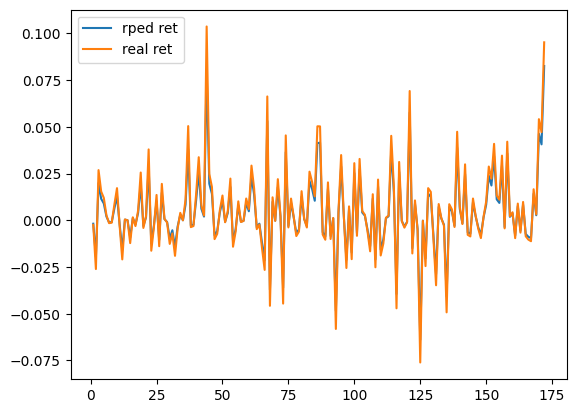

In [129]:
svm_pred = svr_rbf.predict(x_test)
# svm_pred = scaler.inverse_transform(svm_pred.reshape(svm_pred.shape[0],1))
pd.Series(svm_pred).pct_change().plot(label = 'rped ret')
pd.Series(y_test).pct_change().plot(label = 'real ret')

# pd.Series(svm_pred).tail(20).plot(label = 'prediciton')
# pd.Series(y_test).tail(20).plot()
plt.legend()

In [139]:

svr_rbf.predict(x_test[-lag:])

[[0.76263497]
 [0.76504096]
 [0.80643014]
 [0.84446275]
 [0.924883  ]]


array([0.68986965, 0.6917301 , 0.72373449, 0.75314338, 0.81532861])